# 有限マルコフ決定過程

REF : https://github.com/ryuichiueda/probrobo2017/blob/master/07.ipynb

In [1]:
import numpy as np

size = 3
values = [[100,100,100],[100,100,100],[100,100,0]]
goal = (2,2)
actions = ["up","down","left","right"]
policy = [["up","up","up"],["up","up","up"],["up","up",None]] # 初期値はactionsの中から適当に選択

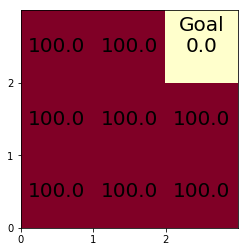

In [2]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos, action):
    fig, ax = plt.subplots()
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            plt.text(x+0.5,y+0.5,int(1000*values[x][y])/1000,ha = 'center', va = 'center', size=20)
            
    plt.text(goal[0]+0.5,goal[1]+0.8,"Goal",ha = 'center', va = 'center', size=20)
    
    if mark_pos == "all":
        for x in range(size):
            for y in range(size):
                if (x, y) != goal:
                    plt.text(x+0.5,y+0.25,policy[x][y],ha = 'center', va = 'center', size=20)
    elif mark_pos != None: 
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None,None)

In [3]:
def postvalue(pos,action):
    p = [pos[0],pos[1]]
    if   action == "up":    p[1] += 1
    elif action == "down":  p[1] -= 1
    elif action == "left":  p[0] -= 1
    elif action == "right": p[0] += 1
    
    for i in [0,1]: # 壁にぶつかったらそのまま
        if p[i] < 0:     p[i] = 0
        if p[i] >= size: p[i] = size - 1
            
    return values[p[0]][p[1]]

def action_value(pos, action, goal):
    if pos == goal: return values[pos[0]][pos[1]] # ゴールの価値は不変
    
    cur_v = values[pos[0]][pos[1]]
    post_v = postvalue(pos,action)
    
    return 1.0 + 0.9*post_v + 0.1*cur_v #1歩にコスト1がかかる。90%で別の状態へ、10%でそのまま

In [4]:
print(action_value((2,1),"up",goal))
print(action_value((0,0),"down",goal))
print(action_value((2,0),"up",goal))
print(action_value((2,2),"up",goal))

11.0
101.0
101.0
0


In [5]:
def sweep():
    for x in range(size):
        for y in range(size):
            best_action = None
            best_value = max(max(values))
            for act in actions:
                value = action_value((x,y), act, goal)
                #print("(x,y):({}, {}) act {}".format(x, y, value))
                if value < best_value:
                    best_value = value
                    best_action = act
                    #print("(x,y):({}, {}) min values {} when {}".format(x, y, best_value, best_action))
            values[x][y] = best_value
            policy[x][y] = best_action
            #draw((x,y),best_action)

sweep_count = 0

sweep : 1


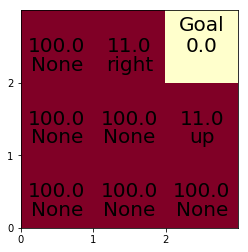

sweep : 2


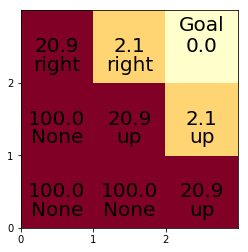

sweep : 3


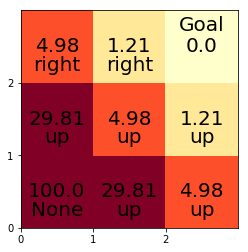

sweep : 4


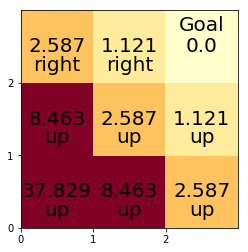

sweep : 5


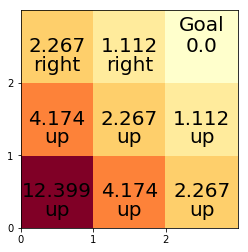

sweep : 6


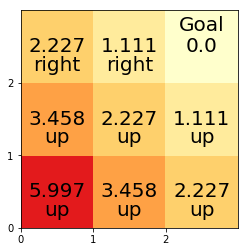

sweep : 7


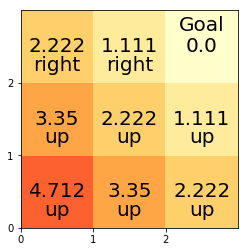

sweep : 8


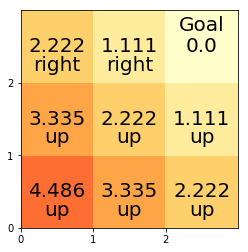

sweep : 9


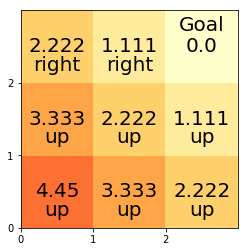

sweep : 10


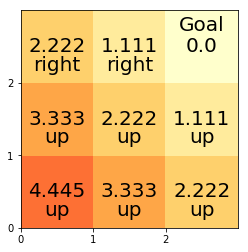

sweep : 11


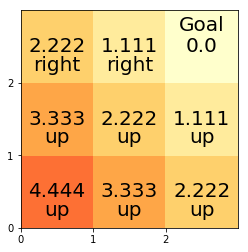

sweep : 12


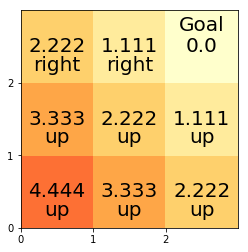

sweep : 13


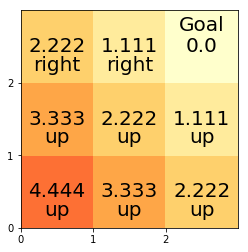

sweep : 14


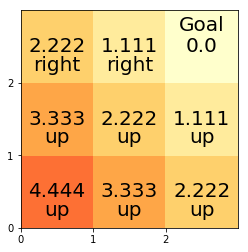

sweep : 15


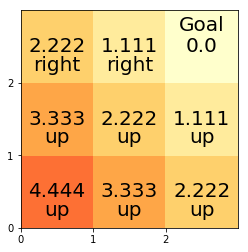

sweep : 16


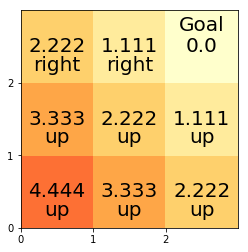

sweep : 17


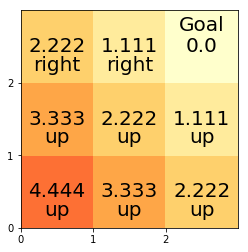

sweep : 18


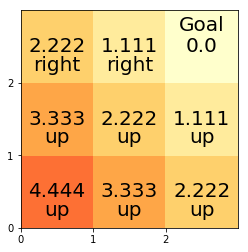

sweep : 19


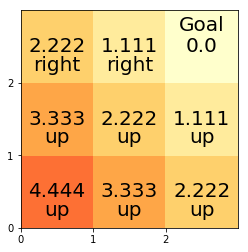

sweep : 20


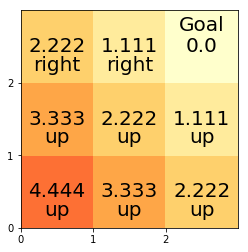

sweep : 21


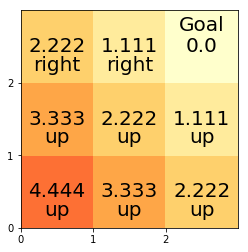

sweep : 22


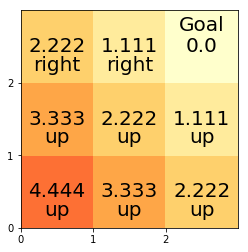

sweep : 23


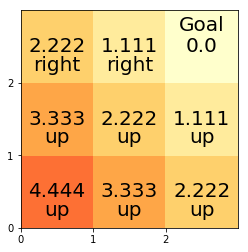

sweep : 24


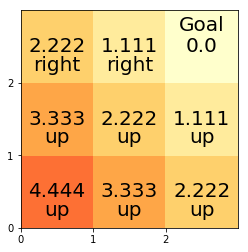

sweep : 25


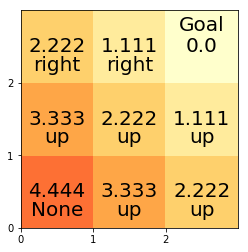

sweep : 26


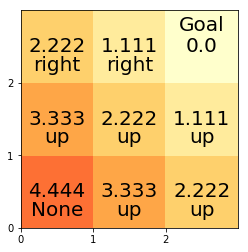

sweep : 27


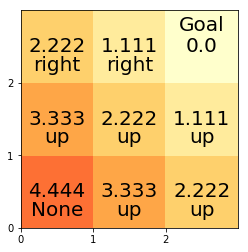

sweep : 28


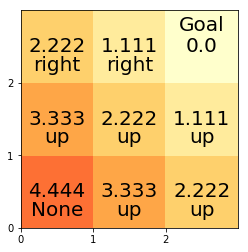

sweep : 29


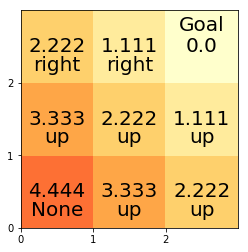

sweep : 30


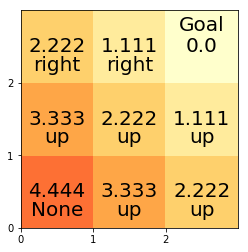

sweep : 31


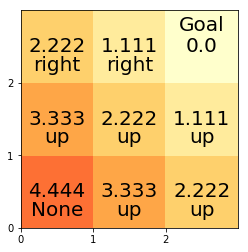

sweep : 32


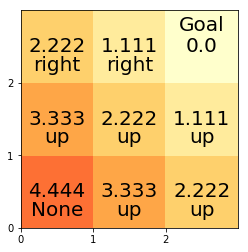

sweep : 33


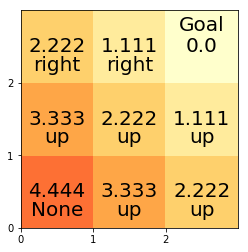

sweep : 34


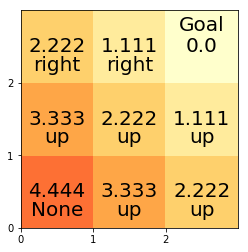

sweep : 35


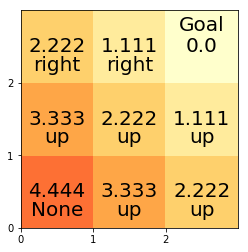

sweep : 36


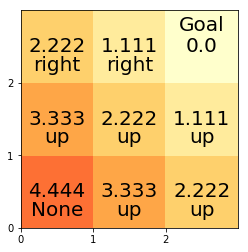

sweep : 37


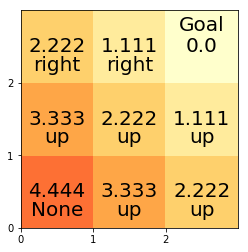

sweep : 38


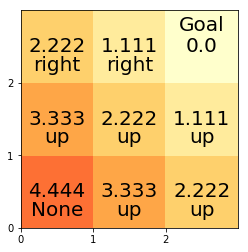

sweep : 39


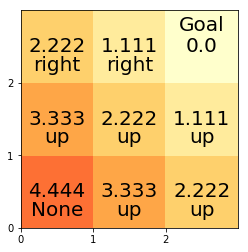

sweep : 40


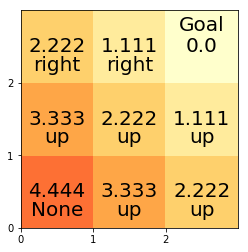

sweep : 41


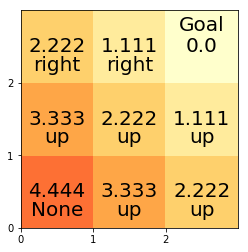

sweep : 42


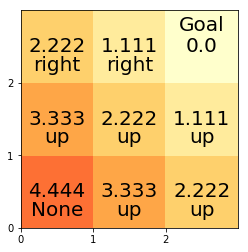

sweep : 43


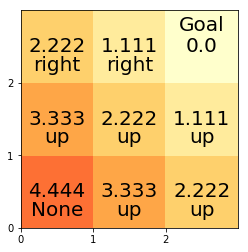

sweep : 44


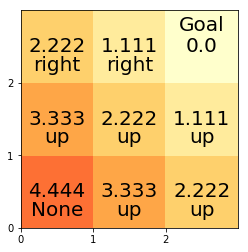

sweep : 45


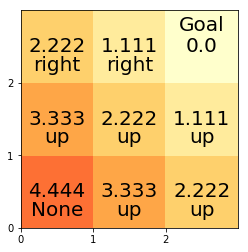

sweep : 46


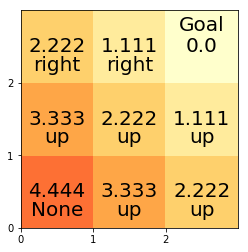

sweep : 47


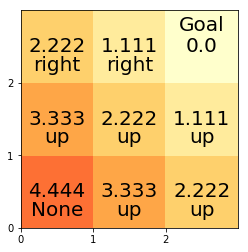

sweep : 48


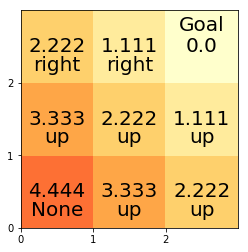

sweep : 49


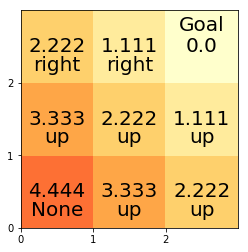

sweep : 50


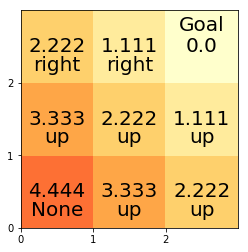

sweep : 51


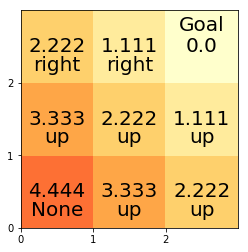

sweep : 52


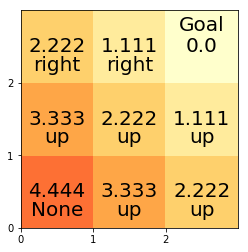

sweep : 53


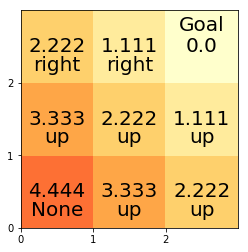

sweep : 54


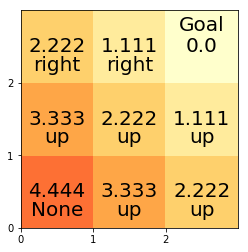

sweep : 55


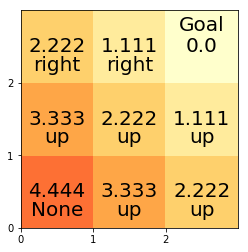

sweep : 56


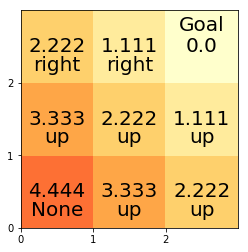

sweep : 57


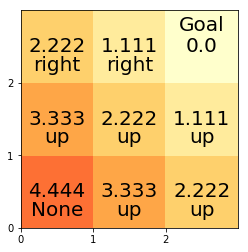

sweep : 58


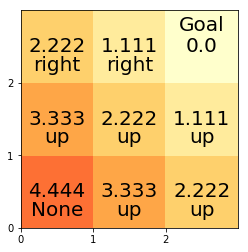

sweep : 59


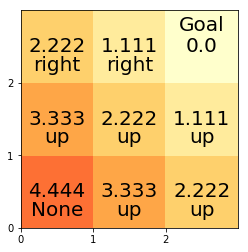

sweep : 60


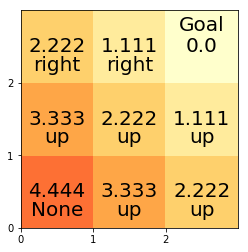

In [6]:
for i in range(60):
    sweep_count += 1
    sweep()
    #print(policy)
    print("sweep : {}".format(sweep_count))
    draw("all", None)